In [2]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sys
sys.path.append('../Codes/')
from models import *
from Epi_models import*
from functions import *
import networkx as nx
import matplotlib.animation as animation
import seaborn
from matplotlib.lines import Line2D

def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
%autosave 60

Autosaving every 60 seconds


## Functions

In [3]:
def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
    
def my_power_law_function(x,a,b,c):
    return 0.0 + b*(x-1)**(-c)

def my_linear_function(x, a, b):
    return a+b*x

def est_function(beta, gamma):
    lambda1 = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2))-1)
    return (1/(lambda1))

def est_function_0(beta, gamma):
    lambda0 = (((beta)/(gamma))-1)
    return (1/(lambda0))

def cumulative_power_law(x, a, b):
    return (x**(a+1)-1)/(b**(a+1)-1)

def cumulative_power_law_2(x, a, b):
    return 1 - (x/b)**(a+1)


## The Network
The network is generated usign the barabasi-albert algorithm. It has a heavy-tailed degree distribution characterized by a power-law behaviour and a exponential cutoff.

In [4]:
N = 2000
graphs_names = np.array(['barabasi-albert','watts-strogatz'])
nodeDegrees = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/network_degree_distrib_N%d.txt'%(N), dtype=np.int32)
meanDegree = np.mean(nodeDegrees)
meanDegree2 = np.mean(nodeDegrees**2)
degree_distrib = np.histogram(nodeDegrees, bins=range(2, max(nodeDegrees)+1), density = True)
print(max(nodeDegrees), min(nodeDegrees), meanDegree, meanDegree2)

195 1 3.996 46.88504867256637


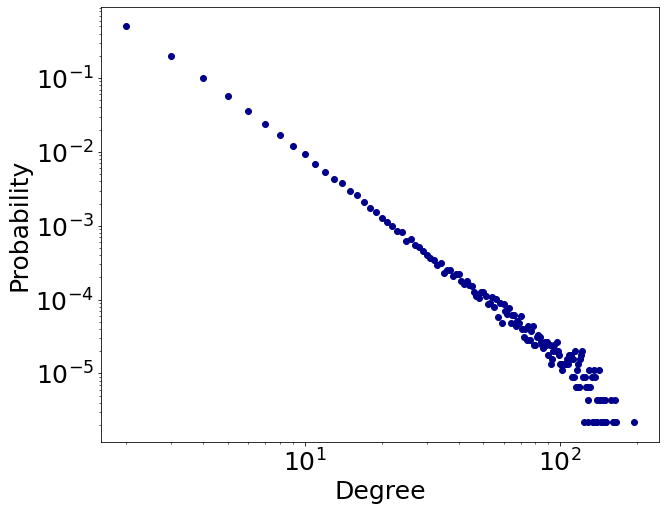

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(degree_distrib[1][:-1], degree_distrib[0], 'o', color = 'darkblue')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Degree', fontsize = 25)
ax.set_ylabel('Probability', fontsize = 25)
ax.tick_params(labelsize = 25)

In [6]:
colors_R = plt.cm.Paired(range(8))
N = 2000
print('N:', N)
gamma = 1/6
print('Gamma:', gamma)
sigma = 1/4
print('Sigma:', sigma)
# I defined the R0 values for the SIR model and then get the values of beta
R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8]) #for p=1.0 I don't take into account R0=0.8
betas = R0s*gamma
print('betas:', betas)
R0_es = np.sqrt(1-4*((sigma*gamma-sigma*betas)/(sigma+gamma)**2))
Ts = 1-((meanDegree)/(meanDegree+R0s))
T_c = (meanDegree)/(meanDegree2-meanDegree)
R0_ns = Ts/T_c
print('T_c:', T_c)
print('Ts:', Ts)
print('R0s:', R0s)
print('R0_es:', R0_es)
print('R0_ns:', R0_ns)
tau = 1/gamma
tau_e = 2*(gamma+sigma)**(-1)
print('tau:', tau)
print('tau_e:', tau_e)

N: 2000
Gamma: 0.16666666666666666
Sigma: 0.25
betas: [0.75       0.5        0.33333333 0.2        0.13333333]
T_c: 0.09317063734631188
Ts: [0.52966102 0.42881647 0.3335557  0.23094688 0.16680567]
R0s: [4.5 3.  2.  1.2 0.8]
R0_es: [2.0880613  1.70880075 1.4        1.09178753 0.8988882 ]
R0_ns: [5.68484913 4.60248506 3.58005176 2.47875177 1.79032446]
tau: 6.0
tau_e: 4.800000000000001


## What is the probability of establishment?

444
1056
2009
4212


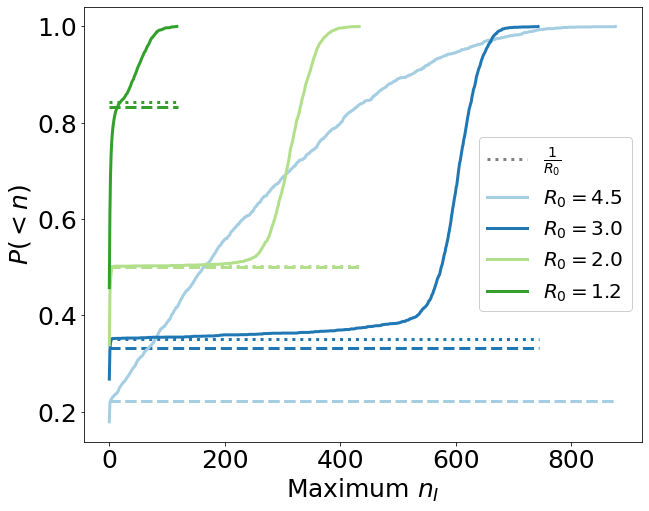

In [7]:
lines_symbols = [Line2D([0], [0], color='grey', linewidth=3, linestyle='dotted', ms = 8)]
labels_symbols = [r'$\frac{1}{R_0}$']


fig, ax = plt.subplots(figsize = (10,8))
p=1.0
sigma=1000
if(p==0.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==1.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2])    
for i, R0 in enumerate(R0s):
    data = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    max_values = np.array([max(data[i,:]) for i in range(len(data[:,0]))])
    data_ext = [((data[i,-1]==0) & (max(data[i,:]) < 20)) for i in range(len(data[:,0]))]
    n_ext = len(data[:,0][data_ext])
    print(n_ext)
    prob_ext = n_ext/len(data[:,0])
    data_hist = numpy.histogram(max_values, bins = range(0,int(max(max_values))+2, 1), density =True);
    ax.plot(data_hist[1][:-1], np.cumsum(data_hist[0]), '-', color = colors_R[i], linewidth = 3, label = r'$R_0=$%.1f'%(R0))
    #ax.plot(data_hist[1][:-1], data_hist[0], '-', color = color_Rs[i], linewidth = 3, alpha = 0.3)
    ax.hlines(1/(R0), 0,int(max(max_values))+2, color = colors_R[i], linewidth=3, linestyle='dashed' )
    ax.hlines(prob_ext, 0,int(max(max_values))+2, color = colors_R[i], linewidth=3, linestyle='dotted' )

ax.set_xlabel(r'Maximum $n_{{I}}$', fontsize = 25)
ax.set_ylabel(r'$P(<n)$', fontsize = 25)
#ax.set_xlim(0, 20)
#ax.set_ylim(0, 10)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.tick_params(labelsize = 25)
handles, labels = ax.get_legend_handles_labels()
ax.legend(np.concatenate((lines_symbols,handles)), np.concatenate((labels_symbols,labels)) , fontsize = 20, loc = 5, framealpha=.95)
#fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/maximum_ni_1_sigma_%.2f_p%.1f.pdf'%(sigma,p))


## How does the probability of epidemic depends on the outbreak size?

# SIR

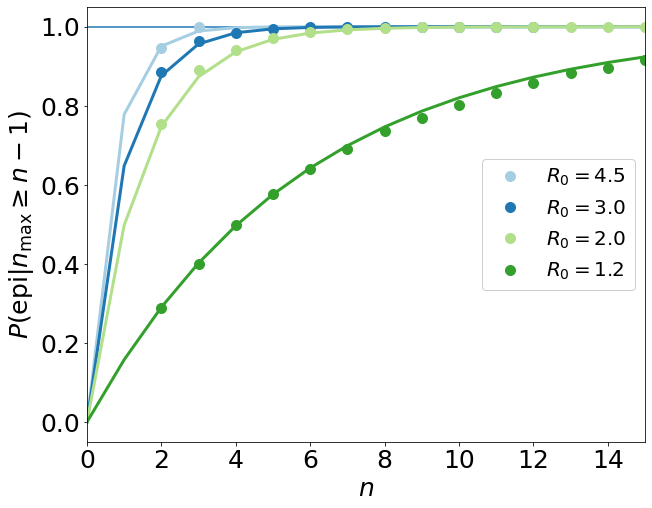

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
p=1.0
sigma=1000
if(p==0.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==1.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2])   
prob_epi_ns = np.empty(50)
for i, R0 in enumerate(R0s):
    prob_epi_n_temp = np.ones(50)
    data = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    max_values = np.array([max(data[i,:]) for i in range(len(data[:,0]))])
    data_ext = [((data[i,-1]==0) & (max(data[i,:]) < 20)) for i in range(len(data[:,0]))]
    n_ext = len(data[:,0][data_ext])
    prob_ext = n_ext/len(data[:,0])
    data_hist = numpy.histogram(max_values, bins = range(0,int(max(max_values))+2, 1), density =True);
    data_hist_ext = numpy.histogram(max_values, bins = range(0,data_hist[1][:-1][np.cumsum(data_hist[0])<=prob_ext][-1]+2, 1), density =True);
    #ax.plot(data_hist_ext[1][:-1], ((data_hist_ext[0]*1)/1), '-', color = colors[i], linewidth = 3, label = r'$R_0=$%.1f'%(R0))
    prob_epi_n = 1-(((1-np.cumsum(data_hist_ext[0]))*prob_ext)/(1-np.cumsum(data_hist[0])[data_hist_ext[1][:-1]]))
    shape = np.shape(prob_epi_n)
    prob_epi_n_temp[:shape[0]]=prob_epi_n
    prob_epi_ns = np.vstack((prob_epi_ns, prob_epi_n_temp))
    ax.plot(data_hist_ext[1][:-1]+2, prob_epi_n , 'o', color = colors_R[i], ms = 10,  label = r'$R_0=$%.1f'%(R0))
    ax.plot(np.array(range(20)), 1-(prob_ext)**(np.array(range(20))),linewidth = 3, color = colors_R[i])
ax.hlines(1,0,40)
ax.set_xticks(np.array(range(0,20,2)))
ax.set_xlabel(r'$n$', fontsize = 25)
ax.set_ylabel(r'$P(\mathrm{epi}|n_{\mathrm{max}}\geq n-1)$', fontsize = 25)
ax.set_xlim(0, 15)
#ax.set_ylim(0, 1)
#ax.set_yscale('log')
ax.tick_params(labelsize = 25)
handles, labels = ax.get_legend_handles_labels()
ax.legend(np.concatenate(([],handles)), np.concatenate(([],labels)) , fontsize = 20, loc = 5, framealpha=.95)
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/epi_prob_nmax_SIR_n_data_p%.1f.pdf'%(p))
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/epi_prob_nmax_SIR_n_data_p%.1f.png'%(p))


0.863


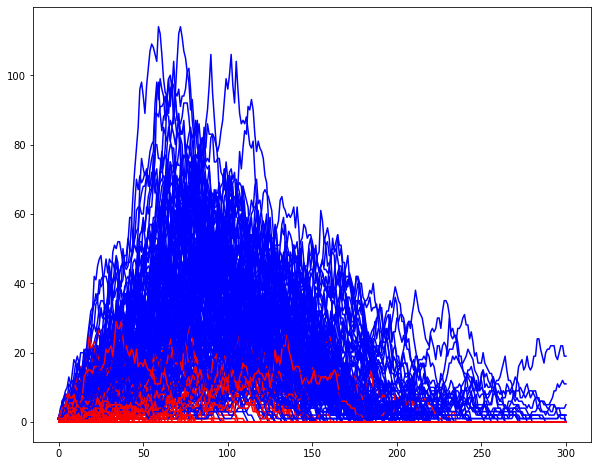

In [9]:
fig, ax = plt.subplots(figsize = (10,8))
R0=1.2
data = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
counter = 0 
for i in range(1000):
    if(data[i,-1]==0 and (max(data[i,:])<30)):
        counter+=1
        color = 'r'
    else:
        color = 'b'
    ax.plot(data[i,:], color = color);
#ax.set_yscale('log')
print(counter/1000)

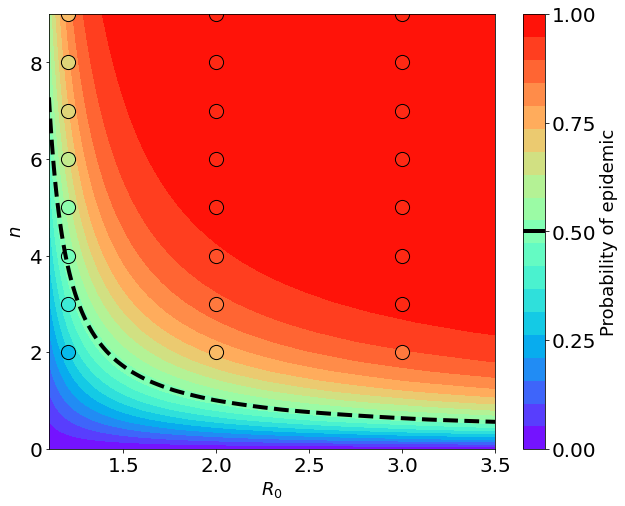

In [10]:
R0s = np.linspace(1.1, 5, 500)
ns = np.linspace(0, 20, 100)
R0s_data = np.array([4.5, 3.0, 2.0, 1.2])
ns_data = np.linspace(0, 19, 20)
x, y = np.meshgrid(R0s, ns)
z = 1-(1/x)**(y)
fig, ax = plt.subplots(figsize = (10,8))
cs = ax.contourf(x, y, z, levels = np.linspace(0,1,20), cmap = plt.cm.rainbow)
cs2 = ax.contour(cs, levels=[0.5], colors='k', linestyles = 'dashed', linewidths = 4)
for i in range(len(R0s_data)):
    for j in range(len(ns_data)):
        #print(int(100*prob_epi_ns[1:,:][i,j]))
        #print(plt.cm.rainbow(np.linspace(0,1,200))[int(199*prob_epi_ns[1:,:][i,j])])
        ax.scatter(R0s_data[i], ns_data[j]+2, color = plt.cm.rainbow(np.linspace(0,1,20))[int(19*prob_epi_ns[1:,:][i,j])], s = 200, edgecolors='k')
ax.set_yticks(range(0,20,2))
ax.set_xlim(1.1,3.5)
ax.set_ylim(0,9)
ax.set_xlabel(r'$R_0$', fontsize = 18)
ax.set_ylabel(r'$n$', fontsize = 18)
ax.tick_params(labelsize = 20)
cbar = fig.colorbar(cs, ticks=np.linspace(0,1,5))
cbar.ax.set_yticks(range(2))
cbar.ax.set_ylabel('Probability of epidemic', fontsize = 18)
#cbar.ax.set_yticklabels(np.linspace(0,1,5))
cbar.ax.tick_params(labelsize = 20)
cbar.add_lines(cs2)
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SIR_R0_p%.1f.pdf'%(p))
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SIR_R0_p%.1f.png'%(p))


# SEIR

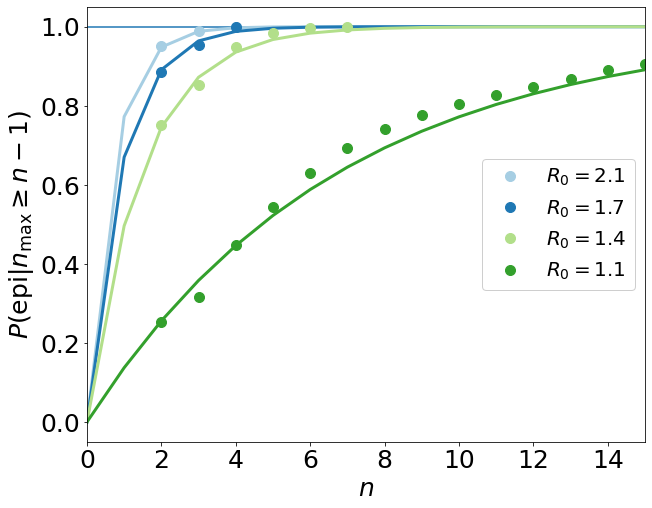

In [11]:
fig, ax = plt.subplots(figsize = (10,8))
colors = plt.cm.Paired(range(7))
p=1.0
sigma=1/4
if(p==0.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==1.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2])
       
prob_epi_ns = np.empty(50)
for i, R0 in enumerate(R0s):
    beta = R0*gamma
    prob_epi_n_temp = np.ones(50)
    data = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    R0 = np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2))
    max_values = np.array([max(data[i,:]) for i in range(len(data[:,0]))])
    data_ext = [((data[i,-1]==0) & (max(data[i,:]) < 20)) for i in range(len(data[:,0]))]
    n_ext = len(data[:,0][data_ext])
    prob_ext = n_ext/len(data[:,0])
    data_hist = numpy.histogram(max_values, bins = range(0,int(max(max_values))+2, 1), density =True);
    data_hist_ext = numpy.histogram(max_values, bins = range(0,data_hist[1][:-1][np.cumsum(data_hist[0])<=prob_ext][-1]+2, 1), density =True);
    #ax.plot(data_hist_ext[1][:-1], ((data_hist_ext[0]*1)/1), '-', color = colors[i], linewidth = 3, label = r'$R_0=$%.1f'%(R0))
    prob_epi_n = 1-(((1-np.cumsum(data_hist_ext[0]))*prob_ext)/(1-np.cumsum(data_hist[0])[data_hist_ext[1][:-1]]))
    shape = np.shape(prob_epi_n)
    prob_epi_n_temp[:shape[0]]=prob_epi_n
    prob_epi_ns = np.vstack((prob_epi_ns, prob_epi_n_temp))
    ax.plot(data_hist_ext[1][:-1]+2, prob_epi_n , 'o', color = colors[i], ms = 10,  label = r'$R_0=$%.1f'%(R0))
    ax.plot(np.array(range(20)), 1-(prob_ext)**(np.array(range(20))),linewidth = 3, color = colors[i])
ax.hlines(1,0,40)
ax.set_xticks(np.array(range(0,20,2)))
ax.set_xlabel(r'$n$', fontsize = 25)
ax.set_ylabel(r'$P(\mathrm{epi}|n_{\mathrm{max}}\geq n-1)$', fontsize = 25)
ax.set_xlim(0, 15)
#ax.set_ylim(0, 1)
#ax.set_yscale('log')
ax.tick_params(labelsize = 25)
handles, labels = ax.get_legend_handles_labels()
ax.legend(np.concatenate(([],handles)), np.concatenate(([],labels)) , fontsize = 20, loc = 5, framealpha=.95)
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/epi_prob_nmax_SEIR_n_data_p%.1f.pdf'%(p))
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/epi_prob_nmax_SEIR_n_data_p%.1f.png'%(p))



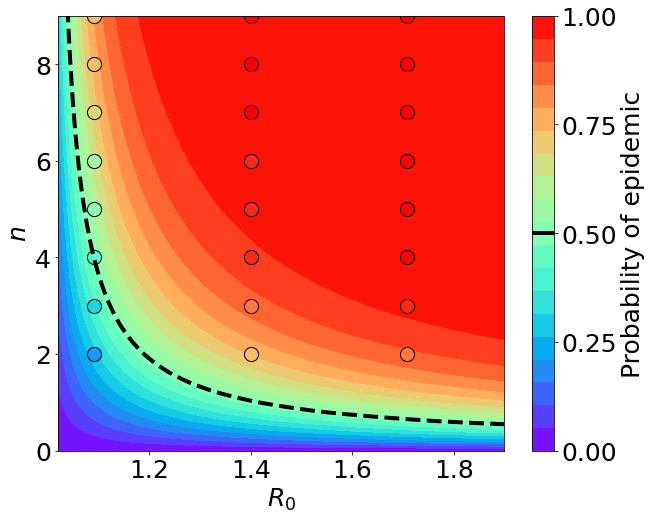

In [12]:
R0s = np.linspace(1.02, 2.5, 500)
ns = np.linspace(0, 20, 100)
R0s_data = np.array([4.5, 3.0, 2.0, 1.2])
betas = R0s_data*gamma
R0s_data = np.sqrt(1-4*((sigma*gamma-sigma*betas)/(sigma+gamma)**2))
ns_data = np.linspace(0, 19, 20)
x, y = np.meshgrid(R0s, ns)
z = 1-(1/(x)**2)**(y)
fig, ax = plt.subplots(figsize = (10,8))
cs = ax.contourf(x, y, z, levels = np.linspace(0,1,20), cmap = plt.cm.rainbow)
cs2 = ax.contour(cs, levels=[0.5], colors='k', linestyles = 'dashed', linewidths = 4)
for i in range(len(R0s_data)):
    for j in range(len(ns_data)):
        #print(int(100*prob_epi_ns[1:,:][i,j]))
        #print(plt.cm.rainbow(np.linspace(0,1,200))[int(199*prob_epi_ns[1:,:][i,j])])
        ax.scatter(R0s_data[i], ns_data[j]+2, color = plt.cm.rainbow(np.linspace(0,1,20))[int(19*prob_epi_ns[1:,:][i,j])], s = 200, edgecolors='k')
ax.set_yticks(range(0,20,2))
ax.set_xlim(1.02,1.9)
ax.set_ylim(0,9)
ax.set_xlabel(r'$R_0$', fontsize = 25)
ax.set_ylabel(r'$n$', fontsize = 25)
ax.tick_params(labelsize = 25)
cbar = fig.colorbar(cs, ticks=np.linspace(0,1,5))
cbar.ax.set_yticks(range(2))
cbar.ax.set_ylabel('Probability of epidemic', fontsize = 25)
#cbar.ax.set_yticklabels(np.linspace(0,1,5))
cbar.ax.tick_params(labelsize = 25)
cbar.add_lines(cs2)
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SEIR_R0_p%.1f.pdf'%(p))
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SEIR_R0_p%.1f.png'%(p))



# How does the probability of epidemic depends on the degree of patient zero?

# SIR

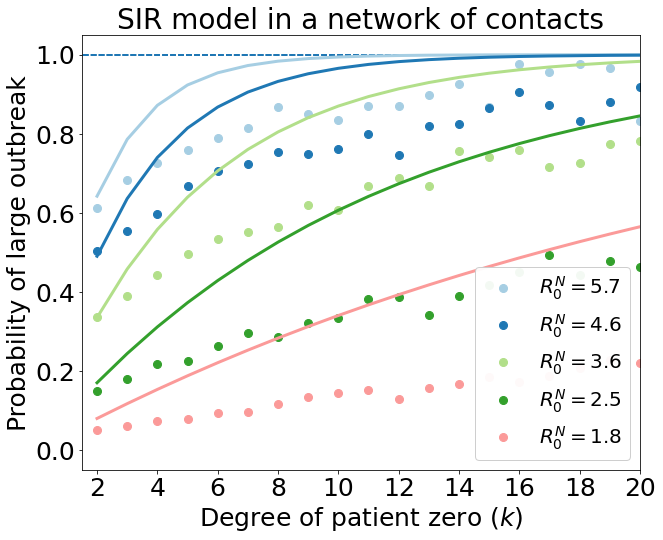

In [13]:
from scipy.stats import expon
from scipy.special import gamma, gammaincc, exp1
def inc_gamma(a, x):
    return exp1(x) if a == 0 else gamma(a)*gammaincc(a, x)

lines_symbols = [Line2D([0], [0], color='grey', linewidth=3, linestyle='--', ms = 8)]
labels_symbols = [r'A/F $1-\frac{1}{R0}$']

sigma = 1000
p=0.0
gamma = 1/6
R0s = np.array([4.5, 3.0, 2.0, 1.2])
R0s2 = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==0.0):
    betas = R0s2*gamma
if(p==1.0):
    betas = R0s*gamma

u = np.linspace(0.00005,0.9,100000)
prob_epi_ns = np.empty(25)
#----Critical occupancy----
T_c = meanDegree/(meanDegree2-meanDegree)
#print('T_c:',T_c, '\n')

#----Load data network of contacts----
k = degree_distrib[1][:-1]
p_k = degree_distrib[0]
#----o----

fig, ax = plt.subplots(figsize = (10,8))
if(p==1.0):
    ax.set_title('SIR Fully connected model', fontsize = 28)
if(p==0.0):
    ax.set_title('SIR model in a network of contacts', fontsize = 28)

for beta, color, in zip(betas, colors_R):
    
    #----Edge Occupancy probability----
    #T = 1-sum(p_k*((4)/((4+((beta*k)/(gamma))))))/(sum(p_k))
    T = 1-((meanDegree)/((meanDegree+((beta)/(gamma)))))
    #T = ((beta)/(4*gamma))*np.exp(((beta)/(4*gamma)))*inc_gamma(0.0, beta/(4*gamma))
    
    #----Reproductive number----
    if(p==1.0):
        R0 = beta/gamma
    if(p==0.0):
        R0 = T/T_c
    #----Epidemic probability as a function of degree of patient zero----  
    if(p==0.0):
        u_sol = u[[sum(p_k*k*(1+(i-1)*T)**(k-1)) for i in u]>(sum(p_k*k)*u)][-1]
        e_k = 1-(1-T+(T*u_sol))**k


    #----Load data with simulation outcomes----
    data_stats = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/stats_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(beta/gamma, sigma, N, p))
    data_I = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(beta/gamma, sigma, N, p))
    max_values = np.array([max(data_I[i,:]) for i in range(len(data_I[:,0]))])
    
    data_ext = np.array([((data_I[i,-1]==0) & (max(data_I[i,:]) < 20)) for i in range(len(data_I[:,0]))])
    
    degrees_epi, counts_epi = np.unique(data_stats[:,0][~data_ext], return_counts=True)
    degrees_ext, counts_ext = np.unique(data_stats[:,0][data_ext], return_counts=True)
    max_degree = max(np.concatenate((degrees_epi, degrees_ext)))
    degrees = np.array(range(2,int(max_degree)))
    e_k_data = np.array([])
    for d in degrees:
        n_epi = 0
        n_ext = 0
        n_epi += max(len(counts_epi[degrees_epi==d]), counts_epi[degrees_epi==d])
        n_ext += max(len(counts_ext[degrees_ext==d]), counts_ext[degrees_ext==d])
        #n_no_epi += max(len(counts_no_epi[degrees_no_epi==d]), counts_no_epi[degrees_no_epi==d])
        n_total = n_epi + n_ext
        if(n_total>0):
            e_k_data = np.append(e_k_data, (n_epi)/n_total)
        else:
            temp = np.isin(degrees, d)
            degrees = degrees[~temp]
    
    prob_epi_ns = np.vstack((prob_epi_ns, e_k_data[:25]))
    #----Plot e_k----
    ax.hlines(1,1,max(degrees)*1.1, linestyle = 'dashed')
    if(p==1.0):
        ax.plot(degrees, e_k_data, 'o', color = color, ms = 8, label = r'$R_0=%.1f$'%(R0))
        #ax.hlines(fixation_prob(1/N, s, N), 1, max_degree , color = color, linewidth = 3, alpha = 0.2)
        ax.hlines(1-(1/R0), 1, max_degree , color = color, linestyle = 'dashed', linewidth = 3)
    if(p==0.0):
        ax.plot(degrees, e_k_data, 'o', color = color, ms = 8, label = r'$R_0^N=%.1f$'%(R0))
        ax.plot(k, e_k, color = color, linewidth = 3)        
    
ax.set_xticks(np.array(range(0,int(max_degree),2)))
ax.set_xlabel(r'Degree of patient zero $(k)$', fontsize = 25)
ax.set_ylabel(r'Probability of large outbreak', fontsize = 25)
ax.tick_params(labelsize = 25)
ax.set_xlim(1.5, 20)
ax.set_ylim(-0.05, 1.05)
#ax.set_xscale('log')

if(p==1.0):
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(np.concatenate((lines_symbols,handles)), np.concatenate((labels_symbols,labels)) , fontsize = 20, loc = 4, framealpha=.95)
if(p==0.0):
    ax.legend(fontsize = 20, loc = 4, framealpha=.95)
#fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/prob_epi_k_p%.1f.pdf'%(p))

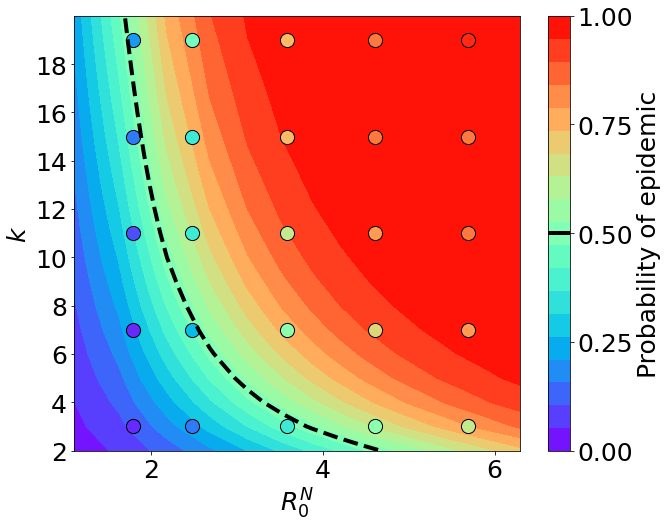

In [14]:
R0s = np.linspace(0.4, 6.3, 20)
ns = np.linspace(0, 20, 100)
R0s_data = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
T_c = meanDegree/(meanDegree2-meanDegree)
Ts = 1-((meanDegree)/((meanDegree+(R0s))))
Ts_data = 1-((meanDegree)/((meanDegree+(R0s_data))))
R0_Ns = Ts/T_c
R0_Ns_data = Ts_data/T_c
u = np.linspace(0.00005,0.9,100000)
u_sols = np.array([u[[sum(p_k*k*(1+(i-1)*T)**(k-1)) for i in u]>(sum(p_k*k)*u)][-1] for T in Ts])
x, y = np.meshgrid(R0_Ns, k[:25])
x2, y2 = np.meshgrid(R0_Ns, p_k[:25])
x3, y3 = np.meshgrid(u_sols, k[:25])
z = 1-(1-(x*T_c)+((x*T_c)*x3))**y

p = 0.0

fig, ax = plt.subplots(figsize = (10,8))
cs = ax.contourf(x, y, z, levels = np.linspace(0,1,20), cmap = plt.cm.rainbow)
cs2 = ax.contour(cs, levels=[0.5], colors='k', linestyles = 'dashed', linewidths = 4)
for i in range(len(R0_Ns_data)):
    for j in range(1, 25, 4):
        ax.scatter(R0_Ns_data[i], k[j], color = plt.cm.rainbow(np.linspace(0,1,20))[int(19*prob_epi_ns[1:,:][i,j])], s = 200, edgecolors='k')
ax.set_yticks(range(0,20,2))
ax.set_xlim(1.1,6.3)
ax.set_ylim(2,20)
ax.set_xlabel(r'$R^N_0$', fontsize = 25)
ax.set_ylabel(r'$k$', fontsize = 25)
ax.tick_params(labelsize = 25)
cbar = fig.colorbar(cs, ticks=np.linspace(0,1,5))
cbar.ax.set_yticks(range(2))
cbar.ax.set_ylabel('Probability of epidemic', fontsize = 25)
#cbar.ax.set_yticklabels(np.linspace(0,1,5))
cbar.ax.tick_params(labelsize = 25)
cbar.add_lines(cs2)
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SIR_R0_p%.1f.pdf'%(p))
fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/Epi_prob_n_SIR_R0_p%.1f.png'%(p))


# SEIR

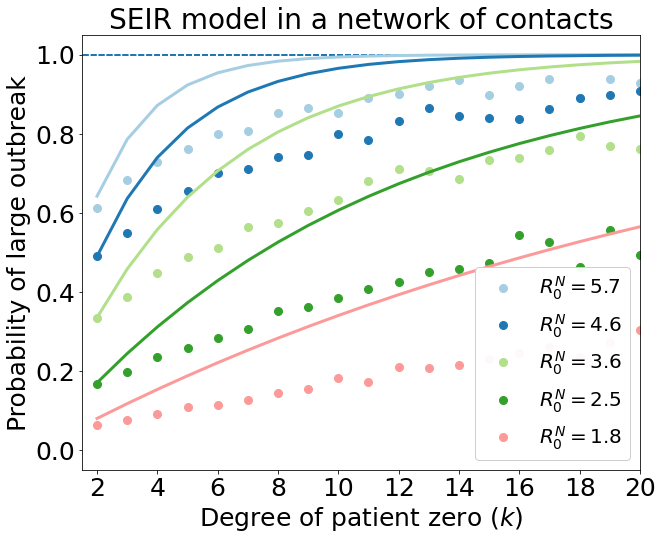

In [15]:
from scipy.stats import expon
from scipy.special import gamma, gammaincc, exp1
def inc_gamma(a, x):
    return exp1(x) if a == 0 else gamma(a)*gammaincc(a, x)

lines_symbols = [Line2D([0], [0], color='grey', linewidth=3, linestyle='--', ms = 8)]
labels_symbols = [r'A/F $1-\frac{1}{R0}$']

N = 2000
sigma = 1/4
gamma = 1/6
p=0.0
R0s = np.array([4.5, 3.0, 2.0, 1.2])
R0s2 = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==0.0):
    betas = R0s2*gamma
if(p==1.0):
    betas = R0s*gamma
colors_R = plt.cm.Paired(range(6))
u = np.linspace(0.00005,0.9,100000)

#----Critical occupancy----
T_c = meanDegree/(meanDegree2-meanDegree)
#print('T_c:',T_c, '\n')

#----Load data network of contacts----
k = degree_distrib[1][:-1]
p_k = degree_distrib[0]
#----o----

fig, ax = plt.subplots(figsize = (10,8))
if(p==1.0):
    ax.set_title('SEIR Fully connected model', fontsize = 28)
if(p==0.0):
    ax.set_title('SEIR model in a network of contacts', fontsize = 28)

for beta, color, in zip(betas, colors_R):
    
    #----Edge Occupancy probability----
    #T = 1-sum(p_k*((4)/((4+((beta*k)/(gamma))))))/(sum(p_k))
    T = 1-((meanDegree)/((meanDegree+((beta)/(gamma)))))
    #T = ((beta)/(4*gamma))*np.exp(((beta)/(4*gamma)))*inc_gamma(0.0, beta/(4*gamma))
    
    #----Reproductive number----
    if(p==1.0):
        R0 = np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2))
    if(p==0.0):
        R0 = T/T_c
    #----Epidemic probability as a function of degree of patient zero----  
    if(p==0.0):
        u_sol = u[[sum(p_k*k*(1+(i-1)*T)**(k-1)) for i in u]>(sum(p_k*k)*u)][-1]
        e_k = 1-(1-T+(T*u_sol))**k


    #----Load data with simulation outcomes----
    data_stats = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/stats_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(beta/gamma, sigma, N, p))
    data_I = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(beta/gamma, sigma, N, p))
    max_values = np.array([max(data_I[i,:]) for i in range(len(data_I[:,0]))])
    
    data_ext = np.array([((data_I[i,-1]==0) & (max(data_I[i,:]) < 20)) for i in range(len(data_I[:,0]))])
    
    degrees_epi, counts_epi = np.unique(data_stats[:,0][~data_ext], return_counts=True)
    degrees_ext, counts_ext = np.unique(data_stats[:,0][data_ext], return_counts=True)
    max_degree = max(np.concatenate((degrees_epi, degrees_ext)))
    degrees = np.array(range(2,int(max_degree)))
    e_k_data = np.array([])
    for d in degrees:
        n_epi = 0
        n_ext = 0
        n_epi += max(len(counts_epi[degrees_epi==d]), counts_epi[degrees_epi==d])
        n_ext += max(len(counts_ext[degrees_ext==d]), counts_ext[degrees_ext==d])
        #n_no_epi += max(len(counts_no_epi[degrees_no_epi==d]), counts_no_epi[degrees_no_epi==d])
        n_total = n_epi + n_ext
        if(n_total>0):
            e_k_data = np.append(e_k_data, (n_epi)/n_total)
        else:
            temp = np.isin(degrees, d)
            degrees = degrees[~temp]
    
    #----Plot e_k----
    ax.hlines(1,1,max(degrees)*1.1, linestyle = 'dashed')
    if(p==1.0):
        ax.plot(degrees, e_k_data, 'o', color = color, ms = 8, label = r'$R_0=%.1f$'%(R0))
        #ax.hlines(fixation_prob(1/N, s, N), 1, max_degree , color = color, linewidth = 3, alpha = 0.2)
        ax.hlines(1-(1/R0**2), 1, max_degree , color = color, linestyle = 'dashed', linewidth = 3)
    if(p==0.0):
        ax.plot(degrees, e_k_data, 'o', color = color, ms = 8, label = r'$R_0^N=%.1f$'%(R0))
        ax.plot(k, e_k, color = color, linewidth = 3)        

ax.set_xticks(np.array(range(0,int(max_degree),2)))
ax.set_xlabel(r'Degree of patient zero $(k)$', fontsize = 25)
ax.set_ylabel(r'Probability of large outbreak', fontsize = 25)
ax.tick_params(labelsize = 25)
ax.set_xlim(1.5, 20)
ax.set_ylim(-0.05, 1.05)
#ax.set_xscale('log')

if(p==1.0):
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(np.concatenate((lines_symbols,handles)), np.concatenate((labels_symbols,labels)) , fontsize = 20, loc = 4, framealpha=.95)
if(p==0.0):
    ax.legend(fontsize = 20, loc = 4, framealpha=.95)
#fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/prob_epi_k_p%.1f.pdf'%(p))

In [16]:
print(np.array((range(2, 25, 4))))

[ 2  6 10 14 18 22]
